### Student Information

#### **Name:** Victor D. Lopez

#### **Student ID:** 110062426

#### **GitHub ID:** vlopez0392

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__.

## **PART I: Take-Home Exercises**

In [187]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# Imports
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

## Construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns = ["text"]);

### Adding category and category names
X["category"] = twenty_train.target;
X["category_name"] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train));

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Exercise 2**

Experiment with other querying techniques using pandas dataframes.

#### **SOLUTION:**

For instance, we may use **Selection by callable** using a callable anonymous function with the dataframe as argument which returns valid output for indexing. We solve Exercise 3 in an alternative fashion with this query technique as follows:

In [188]:
###EXERCISE 2

X.loc[lambda df: df['category'] == 2][::10][:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### **Exercise 5**

When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.


In [189]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [190]:
NA_df['missing_example'].isnull()


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### **SOLUTION:**

The solution is simple. The records corresponding to records 2,3, and 5 are not null values. They are strings. Regardless if they are empty strings or have values such as 'None' or 'NaN', they cannot be considered as missing values.  

According to the documentation, for scalar or array-like objects, only NaN in numeric arrays, None or NaN in object arrays can be considered as missing values. In addition, datetimelike values are with NaT can be considered missing values.

Thus, *isnull()* technically doesn't fail since it returns a correct value according to the given input. If we were to use data which considered string values such as 'None', 'null', 'NaN' or ' ' as missing values, we should first parse these values into the appropriate undefined values before using *isnull()*.

### **Exercise 6**

Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

**SOLUTION:**

From the lab tutorial, the only difference between `X` and `X_sample` considered before Exercise 6 is the length of the original dataframe compared to the sample dataframe. We can consider other differences such as:

<ol>
  <li>Order of the dataframe indices</li>
  <li>Distribution of the different categories</li>
</ol>

First, In the original dataframe, the record indexes are sorted in increasing order (0 to 2256) while in the sampled dataframe the indexes are shuffled. We show this difference in the following cells:

In [191]:
X.head()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


In [192]:
X_sample = X.sample(n=1000,random_state=42) #random state
X_sample.head()

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


Next, we compare the differences in distribution of categories between the original dataframe and the sampled dataframe. As in the lab tutorial we may use the `value_counts()` function to count the number of each category both in the sampled and original dataframe. In addition we may use the `value_counts()` function with parameter *normalize* set to `True` to analyze the relative frequency of each category count.

In [193]:
x = X.category_name
xs = X_sample.category_name

###Create new dataframe
x_DF = pd.DataFrame([x.value_counts(),xs.value_counts(),x.value_counts(normalize = True), xs.value_counts(normalize = True)]).T
x_DF.columns = ["categories_X", "categories_X_sample", "rfreq_X", "r_freq_X_sample"];
x_DF.head()

,categories_X,categories_X_sample,rfreq_X,r_freq_X_sample
soc.religion.christian,599.0,270.0,0.265397,0.270
sci.med,594.0,277.0,0.263181,0.277
comp.graphics,584.0,247.0,0.258751,0.247
alt.atheism,480.0,206.0,0.212672,0.206


Then, our sample has a similar relative frequency compared to the original dataframe. This means the distribution of the categories in the sample resemble the distribution of the categories in the data frame. This means our sample correctly represents the data of the original dataframe.

### **Exercise 8**

 Side-by-side comparison of the distribution between the two datasets.

**SOLUTION:**

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

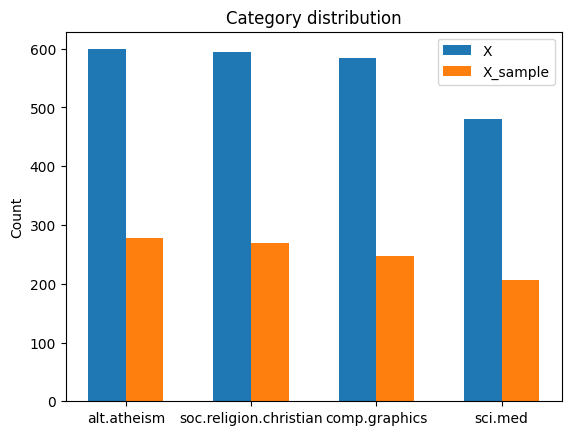

In [195]:
X_data = [x.value_counts().values, xs.value_counts().values]
X_axis = np.arange(len(X_data[0]));

##Plot the categories
plt.bar(X_axis - 0.15, X_data[0], 0.3, label = "X")
plt.bar(X_axis + 0.15, X_data[1], 0.3, label = "X_sample")
plt.xticks(X_axis, categories)
plt.ylabel("Count")
plt.title("Category distribution")
plt.legend()
plt.show()

### **Exercise 10**

We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [196]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [197]:
### Create the unigrams column
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [198]:
### Document-term matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
X_counts.shape

(2257, 35788)

**SOLUTION:**

We use numpy's function `np.argwhere()` to obtain the indexes that match the condition `arr[4] > 0`:

In [199]:
arr = X_counts[0:5, 0:100].toarray();
idx = np.argwhere(arr[4]>0)
print(idx)

[[ 0]
 [37]]


Then, the term with index 37 occurs once in the fifth record. This term is obtained as we did previously:

In [200]:
count_vect.get_feature_names_out()[37]

'01'

### **Exercise 12**

Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

**SOLUTION:**

In [201]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 3)


<Figure size 640x480 with 0 Axes>

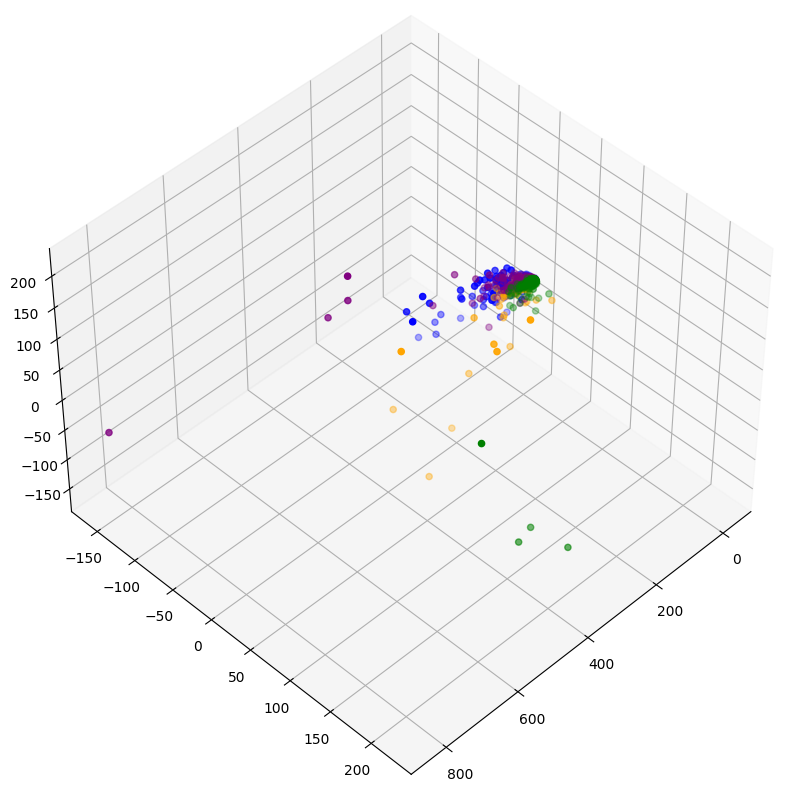

In [202]:
##A helper function to plot 3D scatterplots
def plot3D(X,X_reduced, elev, azimuth):
    fig = plt.figure()
    fig = plt.figure(figsize = (20,10))

    col = ['purple', 'blue', 'green', 'orange'];
    ax = plt.axes(projection='3d')

    ##Add the data
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]

        ax.view_init(elev, azimuth);
        ax.scatter3D(xs, ys, zs, c = c, marker='o');

plot3D(X,X_reduced, 45,45);

<Figure size 640x480 with 0 Axes>

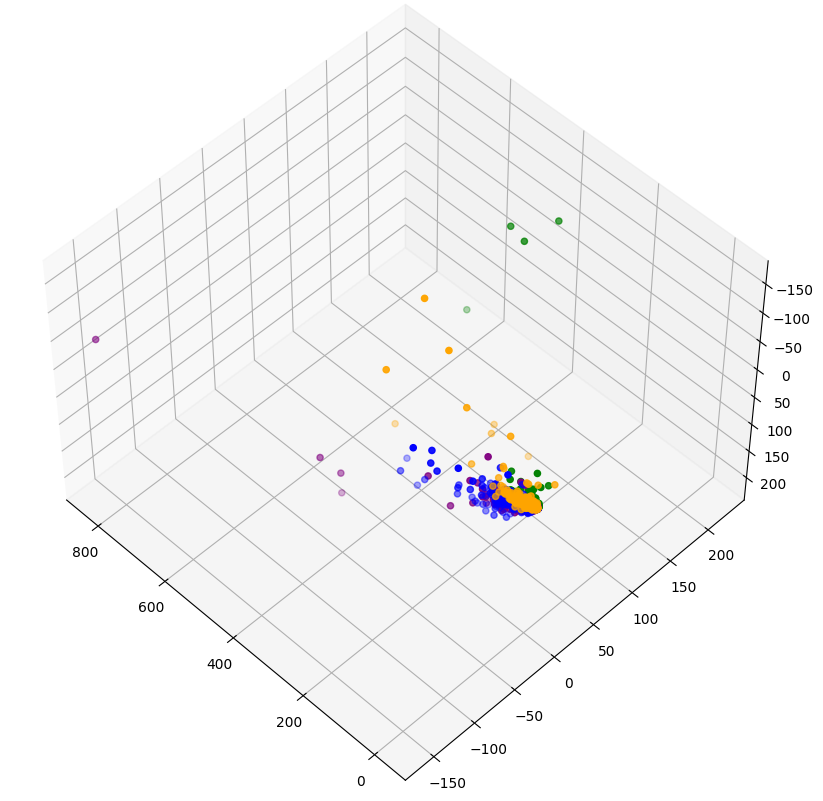

In [203]:
### Figure 2
plot3D(X,X_reduced, -130, 45);

<Figure size 640x480 with 0 Axes>

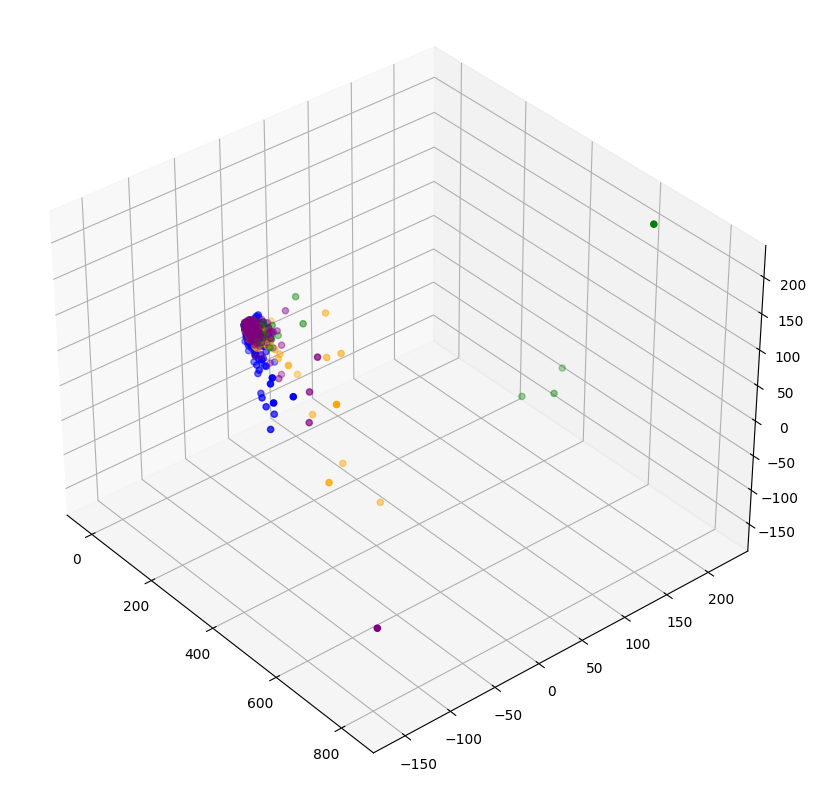

In [204]:
plot3D(X,X_reduced, 35, -40);

Using three PCA components, we can observe the separation of the data in their categories a more clear way compared to using a 2D-plot.

### **Exercise 15**

Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses).

**SOLUTION:**

Let's sort the `term_frequencies` array using `np.sort()` to obtain the terms that occur the most frequently. In addition, we make use of `np.argsort()` to obtain the sequence of indexes that produce a the sorted array. Then, we proceed similarly as in the lab tutorial notebook to visualize the top-k terms that occur most frequently.

In [241]:
term_freq = np.flip(np.sort(np.asarray(X_counts.sum(axis=0))));
term_freq_idx = np.flip(np.argsort(np.asarray(X_counts.sum(axis=0)[0])));

print(term_freq_idx[0][0:10],'\n');
print(term_freq[0][0:10],'\n')
print(pd.Series(count_vect.get_feature_names_out()).iloc[term_freq_idx[0][0:10]])

[32142 23610 32493  4992 18474 17556 32139 18551 35638 14601] 

[29825 17660 17222 13017 12343 11226 10723  8447  6157  5962] 

32142     the
23610      of
32493      to
4992      and
18474      is
17556      in
32139    that
18551      it
35638     you
14601     for
dtype: object


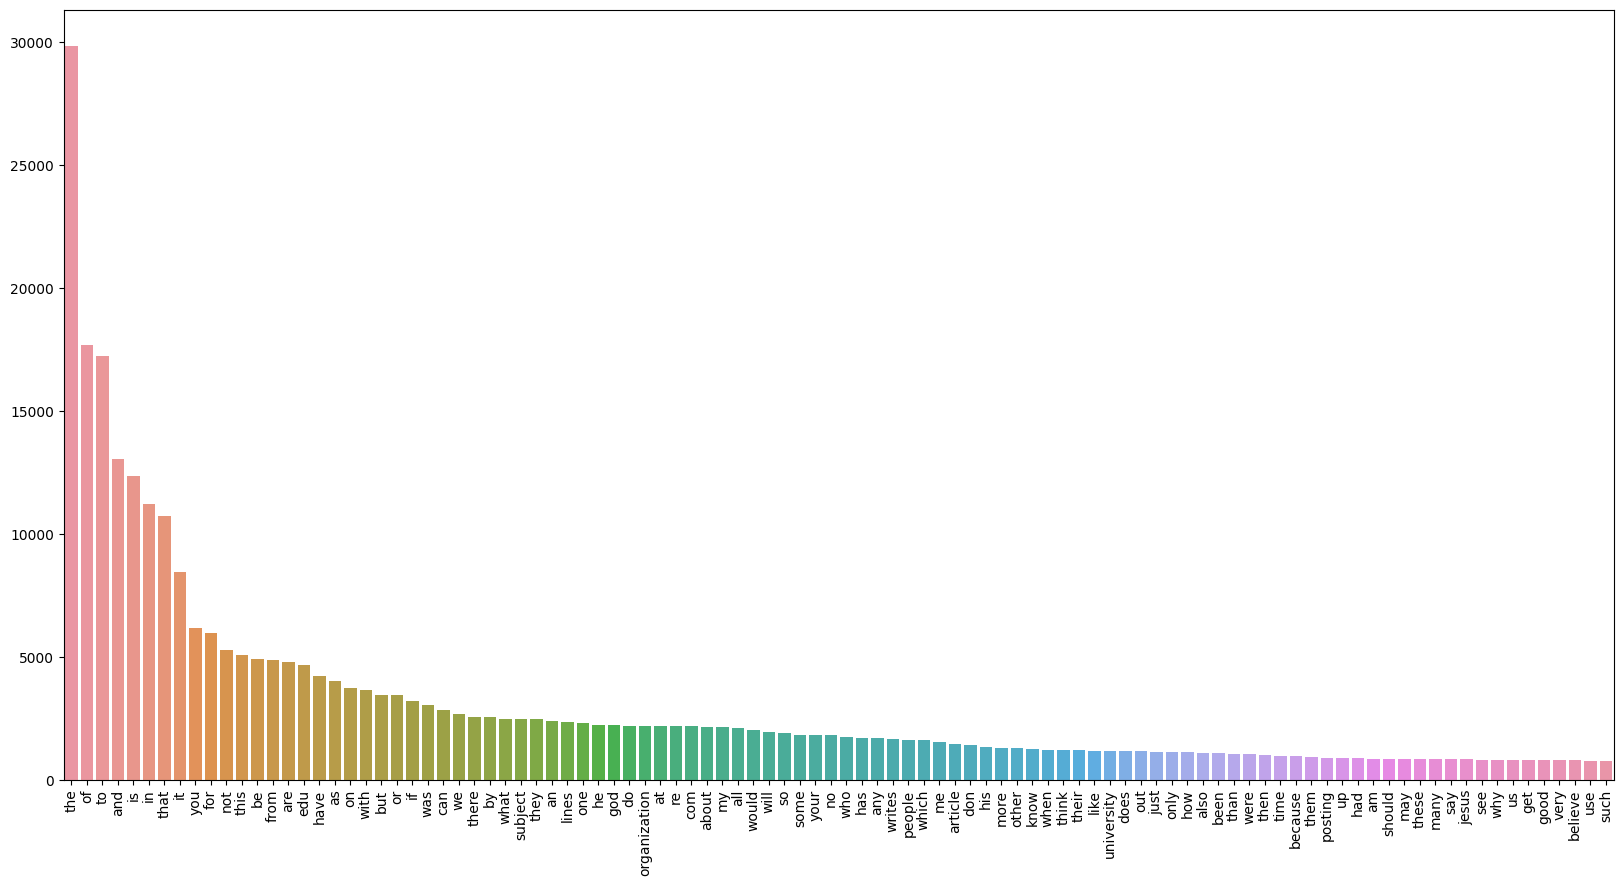

In [302]:
##Plot
import seaborn as sns
k = 100; ##Parameter to control the number of terms we wish to visualize in our graph
x_count = pd.Series(count_vect.get_feature_names_out()).iloc[term_freq_idx[0][0:k]];
y_freq =  pd.Series(term_freq[0][:]).iloc[0:k];
x_count = x_count.array

plt.subplots(figsize=(20, 10))
g = sns.barplot(x = x_count, y = y_freq)
g.set_xticklabels(x_count, rotation = 90);

## **PART II: Sentiment Labelled Sentences Dataset**

### **II.1 Creating our Dataset**

First, we import the necessary modules needed to create the dataset. Some of them were imported previously in this noteboook so make sure to execute the cells above first. We create some lists with useful data such as text file names and website names.

In [206]:
###Imports
import os
import numpy as np
from itertools import chain

###TXT Filenames
txt_files = ["imdb_labelled.txt", "amazon_cells_labelled.txt", "yelp_labelled.txt"];

### Website names and categories
websites = [("imdb",2), ("amazon",3), ("yelp",4)];

The folllowing helper functions read the text files contained in the "sentiment_labelled_sentences" directory (our raw dataset) and parse them into lists containing the text data and targets (either positive or negative reviews).  

In [207]:
###HELPER FUNCTIONS
###Get text (data) and review (target) from list of file lines
def getTextAndReview(file_lines):
  curr_list = [];
  data = [];
  targets = [];

  for st in file_lines:
    curr_list = st.split("\t");
    data.append(str(curr_list[0].strip()));         ##Remove trailing whitespace since its meaningless
    targets.append(int(curr_list[1].rstrip('\n'))); ##Remove the newline character and store as an int

  return [data, targets];

###Parse text file into text (string) and review (int) helper function
def parseTXT(txt_files):
  currFilePath = '';
  file_lines = [];
  data = [];
  targets = []

  ###Open and parse each file
  for file_name in txt_files:
    ##Open the file and read it
    currFilePath = os.path.join(os.getcwd(),"sentiment_labelled_sentences",file_name);
    f = open(currFilePath,'r');
    file_lines = f.readlines();

    ## Process the file and append to data and target lists
    [d, t] = getTextAndReview(file_lines = file_lines);
    data.append(d);
    targets.append(t);

    ## Close the current file
    f.close()

  data = list(chain.from_iterable(data));
  targets = list(chain.from_iterable(targets));
  return [data,targets]

According to the website where we extracted the dataset, there are a total of 3000 review instances among the three websites (imdb, amazon and yelp). For each website there are a total of 1000 reviews. We first show that the length of the returned lists is correct along with the first 5 text data and target instances:

In [208]:
### Verifying correct length of data and target lists
[data, targets] = parseTXT(txt_files);
print(len(data));
print(len(targets));

3000
3000


In [209]:
###First 5 data records
data[0:5]

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.',
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.',
 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.',
 'Very little music or anything to speak of.',
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.']

In [210]:
targets[0:5]

[0, 0, 0, 0, 1]

Next, similar to the category_name column in the lab tutorial we may add the website name where the review came from along with a numerical representation or index of the website. For this, we use the *websites* list of tuples we declared above. Since we know we processed the text files in the order shown in the *txt_files* list, we create two lists of size 3000 with 1000 instances of each website name and index.

In [211]:
website_names = [];
website_index = [];
length = 1000;

for tup in websites:
  website_names.append([tup[0]]*length);
  website_index.append([tup[1]]*length);

website_names = list(chain.from_iterable(website_names));
website_index = list(chain.from_iterable(website_index));

### Verify by printing length of the lists and that the first 5 elements of each website is in the correct index (0:5,1000:1005,2000:2005)
print(len(website_names));
print(len(website_index));
for k in range(0,3): print(website_names[k*length:k*length+5], website_index[k*length:k*length+5]);

3000
3000
['imdb', 'imdb', 'imdb', 'imdb', 'imdb'] [2, 2, 2, 2, 2]
['amazon', 'amazon', 'amazon', 'amazon', 'amazon'] [3, 3, 3, 3, 3]
['yelp', 'yelp', 'yelp', 'yelp', 'yelp'] [4, 4, 4, 4, 4]


Finally, from or lists, we create a Pandas dataframe and display some reviews:

In [212]:
DF = pd.DataFrame(np.column_stack([data, website_names, website_index, targets]),
                               columns=['text','website_name', 'website_index', 'target_review'])

In [213]:
DF[:10]

,text,website_name,website_index,target_review
0,"A very, very, very slow-moving, aimless movie ...",imdb,2,0
1,Not sure who was more lost - the flat characte...,imdb,2,0
2,Attempting artiness with black & white and cle...,imdb,2,0
3,Very little music or anything to speak of.,imdb,2,0
4,The best scene in the movie was when Gerardo i...,imdb,2,1
5,"The rest of the movie lacks art, charm, meanin...",imdb,2,0
6,Wasted two hours.,imdb,2,0
7,Saw the movie today and thought it was a good ...,imdb,2,1
8,A bit predictable.,imdb,2,0
9,Loved the casting of Jimmy Buffet as the scien...,imdb,2,1


In [214]:
DF[1000:1010]

,text,website_name,website_index,target_review
1000,So there is no way for me to plug it in here i...,amazon,3,0
1001,"Good case, Excellent value.",amazon,3,1
1002,Great for the jawbone.,amazon,3,1
1003,Tied to charger for conversations lasting more...,amazon,3,0
1004,The mic is great.,amazon,3,1
1005,I have to jiggle the plug to get it to line up...,amazon,3,0
1006,If you have several dozen or several hundred c...,amazon,3,0
1007,If you are Razr owner...you must have this!,amazon,3,1
1008,"Needless to say, I wasted my money.",amazon,3,0
1009,What a waste of money and time!.,amazon,3,0


In [215]:
DF[2000:2010]

,text,website_name,website_index,target_review
2000,Wow... Loved this place.,yelp,4,1
2001,Crust is not good.,yelp,4,0
2002,Not tasty and the texture was just nasty.,yelp,4,0
2003,Stopped by during the late May bank holiday of...,yelp,4,1
2004,The selection on the menu was great and so wer...,yelp,4,1
2005,Now I am getting angry and I want my damn pho.,yelp,4,0
2006,Honeslty it didn't taste THAT fresh.),yelp,4,0
2007,The potatoes were like rubber and you could te...,yelp,4,0
2008,The fries were great too.,yelp,4,1
2009,A great touch.,yelp,4,1
